In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import mean_squared_error

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2341, 142), (586, 142), (2341, 1), (586, 1))

# Neural Network

In [2]:
st = StandardScaler()
scaled_X_train = st.fit_transform(X_train)

# Model
model = Sequential()
model.add(Dense(200, input_dim=142, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(), metrics=['mean_squared_error'])

hist = model.fit(x=scaled_X_train, y=Y_train, epochs=500, validation_split=.2)

Epoch 1/500
59/59 [==============================] - 1s 5ms/step - loss: 78.0750 - mean_squared_error: 78.0750 - val_loss: 24.3486 - val_mean_squared_error: 24.3486
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 6.0678 - mean_squared_error: 6.0678 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1674 - mean_squared_error: 0.1674 - val_loss: 0.1482 - val_mean_squared_error: 0.1482
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1552 - mean_squared_error: 0.1552 - val_loss: 0.1433 - val_mean_squared_error: 0.1433
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1474 - mean_squared_error: 0.1474 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1326 - mean_squared_error: 0.1326 - val_loss: 0.1181 - val_mean_squared_error: 0.1181
Epoch 7/500
59/59 [===========

Training MSE: 0.00011097540118498728
Validation MSE: 0.01667776331305504


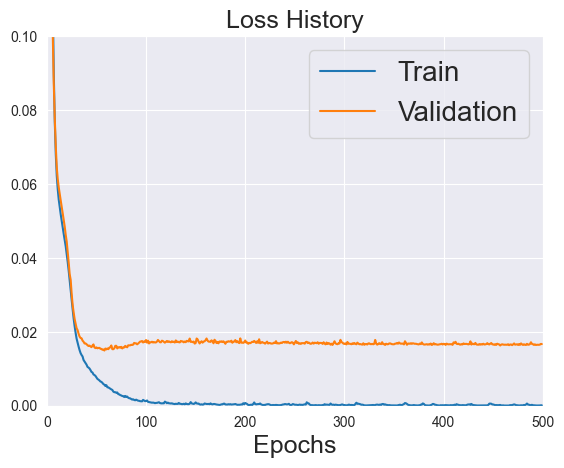

In [3]:
fig, axes = plt.subplots()

axes.plot(hist.history['loss'], label='Train')
axes.plot(hist.history['val_loss'], label='Validation')
axes.set_title("Loss History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)
axes.set_xlim([0, 500])
axes.set_ylim([0, 0.1])

# Final accuracy
print ("Training MSE:", hist.history['mean_squared_error'][-1])
print ("Validation MSE:", hist.history['val_mean_squared_error'][-1])

In [4]:
model.evaluate(scaled_X_train, Y_train)
train_pre = model.predict(scaled_X_train)

74/74 [==============================] - 0s 743us/step


In [5]:
scaled_X_test = st.transform(X_test)
model.evaluate(scaled_X_test, Y_test)
test_pre = model.predict(scaled_X_test)

19/19 [==============================] - 0s 850us/step


In [6]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

Train MSE: 138572913.365
Test MSE: 683021689.839


Text(0, 0.5, 'Sale_Price')

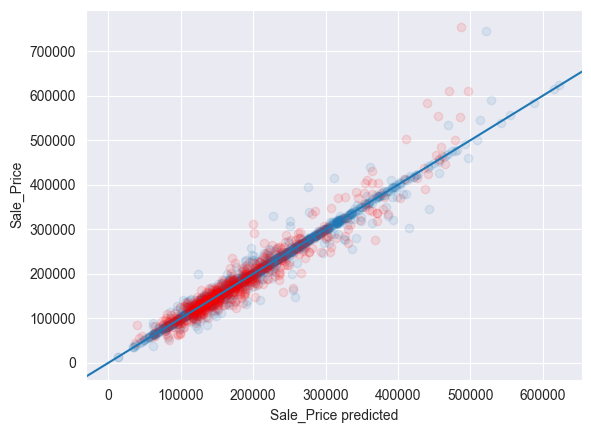

In [7]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Proviamo a ridurre l'overfitting aggiungendo dei Dropout layer

In [8]:
# Model
model = Sequential()
model.add(Dense(200, input_dim=142, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(), metrics=['mean_squared_error'])

hist = model.fit(x=scaled_X_train, y=Y_train, epochs=500, validation_split=.2)

Epoch 1/500
59/59 [==============================] - 1s 3ms/step - loss: 109.6383 - mean_squared_error: 109.6383 - val_loss: 71.3102 - val_mean_squared_error: 71.3102
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 50.1646 - mean_squared_error: 50.1646 - val_loss: 18.9294 - val_mean_squared_error: 18.9294
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 26.6806 - mean_squared_error: 26.6806 - val_loss: 4.1270 - val_mean_squared_error: 4.1270
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 23.2385 - mean_squared_error: 23.2385 - val_loss: 3.0698 - val_mean_squared_error: 3.0698
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 20.4961 - mean_squared_error: 20.4961 - val_loss: 2.2814 - val_mean_squared_error: 2.2814
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 20.1569 - mean_squared_error: 20.1569 - val_loss: 1.8685 - val_mean_squared_error: 1.8685
Epoch 7/500
59/5

Training MSE: 0.013277465477585793
Validation MSE: 0.01700478047132492


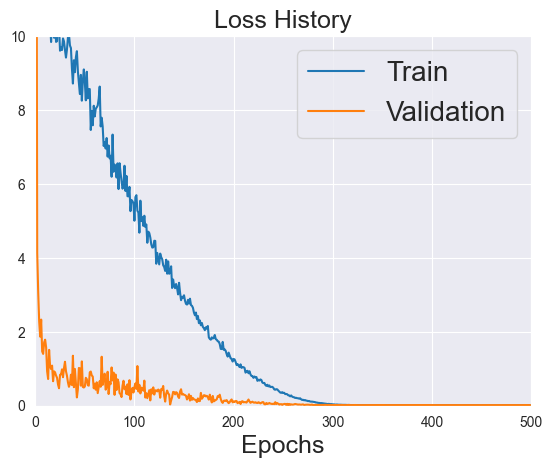

In [9]:
fig, axes = plt.subplots()

axes.plot(hist.history['loss'], label='Train')
axes.plot(hist.history['val_loss'], label='Validation')
axes.set_title("Loss History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)
axes.set_xlim([0, 500])
axes.set_ylim([0, 10])

# Final accuracy
print ("Training MSE:", hist.history['mean_squared_error'][-1])
print ("Validation MSE:", hist.history['val_mean_squared_error'][-1])

In [10]:
model.evaluate(scaled_X_train, Y_train)
train_pre = model.predict(scaled_X_train)

74/74 [==============================] - 0s 809us/step


In [11]:
model.evaluate(scaled_X_test, Y_test)
test_pre = model.predict(scaled_X_test)

19/19 [==============================] - 0s 834us/step


In [12]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

Train MSE: 211719050.006
Test MSE: 824951988.371


## Proviamo a ridurre il numero di features

In [13]:
st = StandardScaler()
scaled_X_train_reduced = st.fit_transform(X_train[FS_RF])

# Model
model = Sequential()
model.add(Dense(200, input_dim=len(FS_RF), activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())

model.fit(x=scaled_X_train_reduced, y=Y_train, epochs=500)

Epoch 1/500
74/74 [==============================] - 0s 1ms/step - loss: 35.5712
Epoch 2/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1815
Epoch 3/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1272
Epoch 4/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1004
Epoch 5/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0754
Epoch 6/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0604
Epoch 7/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 8/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0481
Epoch 9/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 10/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0423
Epoch 11/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0397
Epoch 12/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 13/500
74/74 [================

In [14]:
model.evaluate(scaled_X_train_reduced, Y_train)
train_pre = model.predict(scaled_X_train_reduced)

74/74 [==============================] - 0s 891us/step


In [15]:
scaled_X_test_reduced = st.transform(X_test[FS_RF])
model.evaluate(scaled_X_test_reduced, Y_test)
test_pre = model.predict(scaled_X_test_reduced)

19/19 [==============================] - 0s 948us/step


In [16]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

Train MSE: 23565929.588
Test MSE: 570360569.861


Text(0, 0.5, 'Sale_Price')

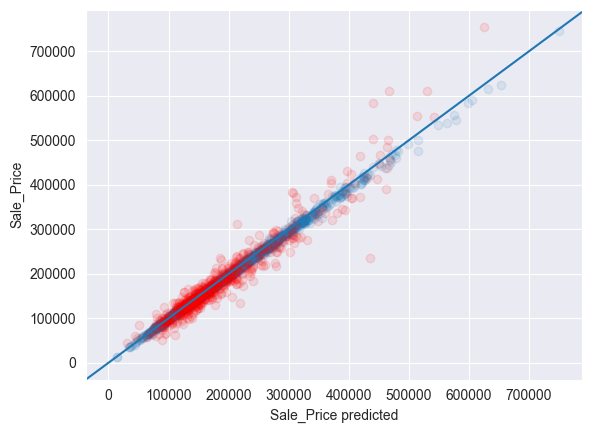

In [17]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')